# <img style="float: left; padding: 0px 10px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/1920px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"  width="80" /> IMT1001 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>

# Tutorial 3 (Continuación): Webscraping.

* Este Notebook expande y completa los ejemplos de webscraping desarrollado en el Tutorial de la semana.



## Ejemplo 1: Ejercicio de práctica 

Repita el ejercicio del Tutorial, ahora para extraer los datos relativos a países productores de café, publicados en la página https://es.wikipedia.org/wiki/Anexo:Pa%C3%ADses_por_producci%C3%B3n_de_caf%C3%A9

In [25]:
#Import needed libraries
from bs4 import BeautifulSoup as bs
import requests as rq
import pandas as pd

In [26]:
url="https://en.wikipedia.org/wiki/List_of_countries_by_coffee_production"
page=rq.get(url).text
soup=bs(page)

table=soup.find('table')

#creamos un DataFrame vacío
df=pd.DataFrame(columns = ['country','bags_60kg','tons_metric','pounds'])

#iterar sobre cada fila ('tr')
for row in table.find_all('tr')[1::]:
    cols = row.find_all("td")
    #print(cols)
    cols = [col.text.strip() for col in cols]
    #print(cols)
    country=cols[1]
    bags=cols[2]
    tons=cols[3]
    pounds=cols[4]
    df=df.append({'country': country, 'bags_60kg': bags, 'tons_metric': tons,'pounds':pounds}, ignore_index=True)
        

In [27]:
df

,country,bags_60kg,tons_metric,pounds
0,Brazil,"44,200,000","2,652,000","5,714,381,000"
1,Vietnam,"27,500,000","1,650,000","3,637,627,000"
2,Colombia,"13,500,000","810,000","1,785,744,000"
3,Indonesia,"11,000,000","660,000","1,455,050,000"
4,Ethiopia,"6,400,000","384,000","846,575,000"
5,Honduras,"5,800,000","348,000","767,208,000"
6,India,"5,800,000","348,000","767,208,000"
7,Uganda,"4,800,000","288,000","634,931,000"
8,Mexico,"3,900,000","234,000","515,881,000"
9,Guatemala,"3,400,000","204,000","449,743,000"


## Ejemplo 2: Información de productos en una tienda

En este Notebok completaremos el ejercicio de extracción de datos desde la página web de una tienda de libros en línea. En el Tutorial, vimos como obtener la URL de la la página de cada producto, y hacer scarping de cada una de ellas para extrar los datos de nombre, precio, categoría, etc.

Sin embargo, al realizar el scraping de la página principal de la página, obtenemos un listado de sólo 20 productos, mientras que la tienda tiene 1000 libros, según se indica en la parte superior de la página:

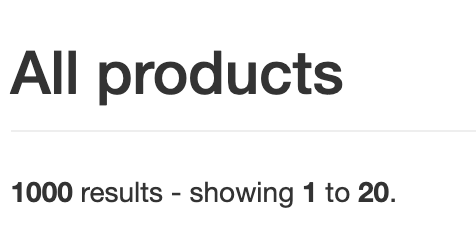

Los resultados están dispuestos de a 20 libros por página. Es decir, para obtener la información de todos los productos a la venta, es necesario repetir el proceso para las 50 páginas de resultados de la tienda.
Eso haremos acá.

Recordemos el código anterior, que nos permite extraer los datos de los primeros 20 productos:

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup 
main_url = "http://books.toscrape.com/"

/Users/paguirre/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [21]:
#resumimos los pasos para llegar a la url de cada producto en una función
def getBooksURLs(url):
    result = requests.get(url)
    soup = BeautifulSoup(result.text, 'html.parser')
    
    lista=soup.findAll("article", class_ = "product_pod")
    book_url_list=['http://books.toscrape.com/catalogue/'+'/'+x.div.a.get('href') for x in lista]
    return(book_url_list)


¿Cómo recorremos las demás páginas de resultados? Note que al recorrer las páginas de resultados, la URL principal de la página va cambiando:

http://books.toscrape.com/catalogue/page-2.html <br>
http://books.toscrape.com/catalogue/page-3.html <br>
http://books.toscrape.com/catalogue/page-4.html <br>
http://books.toscrape.com/catalogue/page-5.html <br>

... y así sucesivamente hasta la página 50.

Por lo tanto, simplemente necesitamos repetir el proceso anterior, pero para las 50 páginas de resultados, para lo cual iremos cambiando el parámetro `main_url`.

In [22]:
#para obtener las urls a todos los productos de la tienda, tenemos que recorrer varias páginas

#primero creamos la lista de páginas a recorrer
pages_urls = []

#para las páginas de 1 a 50
for i in range(1,51,1):
    #generamos la URL de cada página
    new_page="http://books.toscrape.com/catalogue/page-%d.html"%i

    #agregamos un chequeo para asegurarmos de que la página está OK, si no la excluimos de la lista.
    if requests.get(new_page).status_code == 200:
        pages_urls.append(new_page)    

#Veamos algunos ejemplos
print("Ejemplos:")
pages_urls[:5]

Ejemplos:


['http://books.toscrape.com/catalogue/page-1.html',
 'http://books.toscrape.com/catalogue/page-2.html',
 'http://books.toscrape.com/catalogue/page-3.html',
 'http://books.toscrape.com/catalogue/page-4.html',
 'http://books.toscrape.com/catalogue/page-5.html']

In [23]:
#ahora recorremos todas las páginas, para recolectar las url de todos los (1000) productos de la tienda
#la ejecución de esta celda puede demorar un poco más de lo habitual

booksURLs = []
for page in pages_urls:
    booksURLs.extend(getBooksURLs(page))
    
print(str(len(booksURLs)) + " productos con URLs")
print("Ejemplos:")
booksURLs[::5]

1000 productos con URLs
Ejemplos:


['http://books.toscrape.com/catalogue//a-light-in-the-attic_1000/index.html',
 'http://books.toscrape.com/catalogue//the-requiem-red_995/index.html',
 'http://books.toscrape.com/catalogue//starving-hearts-triangular-trade-trilogy-1_990/index.html',
 'http://books.toscrape.com/catalogue//our-band-could-be-your-life-scenes-from-the-american-indie-underground-1981-1991_985/index.html',
 'http://books.toscrape.com/catalogue//in-her-wake_980/index.html',
 'http://books.toscrape.com/catalogue//birdsong-a-story-in-pictures_975/index.html',
 'http://books.toscrape.com/catalogue//the-four-agreements-a-practical-guide-to-personal-freedom_970/index.html',
 'http://books.toscrape.com/catalogue//penny-maybe_965/index.html',
 'http://books.toscrape.com/catalogue//slow-states-of-collapse-poems_960/index.html',
 'http://books.toscrape.com/catalogue//when-we-collided_955/index.html',
 'http://books.toscrape.com/catalogue//unbound-how-eight-technologies-made-us-human-transformed-society-and-brought-our-

Y finalmente repetimos el proceso de scraping para las 1000 páginas de productos:
    

In [24]:
#la ejecución de esta celda puede demorar un poco más de lo habitual

names = []
prices = []
nb_in_stock = []
categories = []

for url in booksURLs:
    html = requests.get(url)
    soup = BeautifulSoup(html.text, 'html.parser')
    
    # Nombre del producto
    names.append(soup.find("div", class_ = "col-sm-6 product_main").h1.text)
    
    # Precio
    prices.append(soup.find("p", class_ = "price_color")) 
    
    # Disponibilidad
    nb_in_stock.append(soup.find("p", class_ = "instock availability").text) # get rid of non numerical characters
    
    # Categoria
    lines=soup.find("ul",class_='breadcrumb').find_all('li')
    category=lines[2].a.text
    categories.append(category)
   
scraped_data = pd.DataFrame({'name': names, 'price': prices, 'nb_in_stock': nb_in_stock, "product_category": categories})
scraped_data

http://books.toscrape.com/catalogue//a-light-in-the-attic_1000/index.html
http://books.toscrape.com/catalogue//tipping-the-velvet_999/index.html
http://books.toscrape.com/catalogue//soumission_998/index.html
http://books.toscrape.com/catalogue//sharp-objects_997/index.html
http://books.toscrape.com/catalogue//sapiens-a-brief-history-of-humankind_996/index.html
http://books.toscrape.com/catalogue//the-requiem-red_995/index.html
http://books.toscrape.com/catalogue//the-dirty-little-secrets-of-getting-your-dream-job_994/index.html
http://books.toscrape.com/catalogue//the-coming-woman-a-novel-based-on-the-life-of-the-infamous-feminist-victoria-woodhull_993/index.html
http://books.toscrape.com/catalogue//the-boys-in-the-boat-nine-americans-and-their-epic-quest-for-gold-at-the-1936-berlin-olympics_992/index.html
http://books.toscrape.com/catalogue//the-black-maria_991/index.html
http://books.toscrape.com/catalogue//starving-hearts-triangular-trade-trilogy-1_990/index.html
http://books.toscra

http://books.toscrape.com/catalogue//patience_916/index.html
http://books.toscrape.com/catalogue//outcast-vol-1-a-darkness-surrounds-him-outcast-1_915/index.html
http://books.toscrape.com/catalogue//orange-the-complete-collection-1-orange-the-complete-collection-1_914/index.html
http://books.toscrape.com/catalogue//online-marketing-for-busy-authors-a-step-by-step-guide_913/index.html
http://books.toscrape.com/catalogue//on-a-midnight-clear_912/index.html
http://books.toscrape.com/catalogue//obsidian-lux-1_911/index.html
http://books.toscrape.com/catalogue//my-paris-kitchen-recipes-and-stories_910/index.html
http://books.toscrape.com/catalogue//masks-and-shadows_909/index.html
http://books.toscrape.com/catalogue//mama-tried-traditional-italian-cooking-for-the-screwed-crude-vegan-and-tattooed_908/index.html
http://books.toscrape.com/catalogue//lumberjanes-vol-2-friendship-to-the-max-lumberjanes-5-8_907/index.html
http://books.toscrape.com/catalogue//lumberjanes-vol-1-beware-the-kitten-ho

http://books.toscrape.com/catalogue//secrets-and-lace-fatal-hearts-1_829/index.html
http://books.toscrape.com/catalogue//scarlett-epstein-hates-it-here_828/index.html
http://books.toscrape.com/catalogue//romero-and-juliet-a-tragic-tale-of-love-and-zombies_827/index.html
http://books.toscrape.com/catalogue//redeeming-love_826/index.html
http://books.toscrape.com/catalogue//poses-for-artists-volume-1-dynamic-and-sitting-poses-an-essential-reference-for-figure-drawing-and-the-human-form_825/index.html
http://books.toscrape.com/catalogue//poems-that-make-grown-women-cry_824/index.html
http://books.toscrape.com/catalogue//nightingale-sing_823/index.html
http://books.toscrape.com/catalogue//night-sky-with-exit-wounds_822/index.html
http://books.toscrape.com/catalogue//mrs-houdini_821/index.html
http://books.toscrape.com/catalogue//modern-romance_820/index.html
http://books.toscrape.com/catalogue//miss-peregrines-home-for-peculiar-children-miss-peregrines-peculiar-children-1_819/index.html
ht

http://books.toscrape.com/catalogue//steve-jobs_737/index.html
http://books.toscrape.com/catalogue//sorting-the-beef-from-the-bull-the-science-of-food-fraud-forensics_736/index.html
http://books.toscrape.com/catalogue//someone-like-you-the-harrisons-2_735/index.html
http://books.toscrape.com/catalogue//so-cute-it-hurts-vol-6-so-cute-it-hurts-6_734/index.html
http://books.toscrape.com/catalogue//shtum_733/index.html
http://books.toscrape.com/catalogue//see-america-a-celebration-of-our-national-parks-treasured-sites_732/index.html
http://books.toscrape.com/catalogue//salt_731/index.html
http://books.toscrape.com/catalogue//robin-war_730/index.html
http://books.toscrape.com/catalogue//red-hoodarsenal-vol-1-open-for-business-red-hoodarsenal-1_729/index.html
http://books.toscrape.com/catalogue//rain-fish_728/index.html
http://books.toscrape.com/catalogue//quarter-life-poetry-poems-for-the-young-broke-and-hangry_727/index.html
http://books.toscrape.com/catalogue//pet-sematary_726/index.html


http://books.toscrape.com/catalogue//my-kitchen-year-136-recipes-that-saved-my-life_646/index.html
http://books.toscrape.com/catalogue//13-hours-the-inside-account-of-what-really-happened-in-benghazi_645/index.html
http://books.toscrape.com/catalogue//will-you-wont-you-want-me_644/index.html
http://books.toscrape.com/catalogue//tipping-point-for-planet-earth-how-close-are-we-to-the-edge_643/index.html
http://books.toscrape.com/catalogue//the-star-touched-queen_642/index.html
http://books.toscrape.com/catalogue//the-silent-sister-riley-macpherson-1_641/index.html
http://books.toscrape.com/catalogue//the-midnight-watch-a-novel-of-the-titanic-and-the-californian_640/index.html
http://books.toscrape.com/catalogue//the-lonely-city-adventures-in-the-art-of-being-alone_639/index.html
http://books.toscrape.com/catalogue//the-gray-rhino-how-to-recognize-and-act-on-the-obvious-dangers-we-ignore_638/index.html
http://books.toscrape.com/catalogue//the-golden-condom-and-other-essays-on-love-lost-an

http://books.toscrape.com/catalogue//23-degrees-south-a-tropical-tale-of-changing-whether_556/index.html
http://books.toscrape.com/catalogue//zero-to-one-notes-on-startups-or-how-to-build-the-future_555/index.html
http://books.toscrape.com/catalogue//why-not-me_554/index.html
http://books.toscrape.com/catalogue//when-breath-becomes-air_553/index.html
http://books.toscrape.com/catalogue//vagabonding-an-uncommon-guide-to-the-art-of-long-term-world-travel_552/index.html
http://books.toscrape.com/catalogue//the-unlikely-pilgrimage-of-harold-fry-harold-fry-1_551/index.html
http://books.toscrape.com/catalogue//the-new-drawing-on-the-right-side-of-the-brain_550/index.html
http://books.toscrape.com/catalogue//the-midnight-assassin-panic-scandal-and-the-hunt-for-americas-first-serial-killer_549/index.html
http://books.toscrape.com/catalogue//the-martian-the-martian-1_548/index.html
http://books.toscrape.com/catalogue//the-high-mountains-of-portugal_547/index.html
http://books.toscrape.com/catal

http://books.toscrape.com/catalogue//fruits-basket-vol-7-fruits-basket-7_468/index.html
http://books.toscrape.com/catalogue//for-the-love-fighting-for-grace-in-a-world-of-impossible-standards_467/index.html
http://books.toscrape.com/catalogue//finding-god-in-the-ruins-how-god-redeems-pain_466/index.html
http://books.toscrape.com/catalogue//every-heart-a-doorway-every-heart-a-doorway-1_465/index.html
http://books.toscrape.com/catalogue//delivering-the-truth-quaker-midwife-mystery-1_464/index.html
http://books.toscrape.com/catalogue//counted-with-the-stars-out-from-egypt-1_463/index.html
http://books.toscrape.com/catalogue//chronicles-vol-1_462/index.html
http://books.toscrape.com/catalogue//blue-like-jazz-nonreligious-thoughts-on-christian-spirituality_461/index.html
http://books.toscrape.com/catalogue//benjamin-franklin-an-american-life_460/index.html
http://books.toscrape.com/catalogue//at-the-existentialist-cafe-freedom-being-and-apricot-cocktails-with-jean-paul-sartre-simone-de-beau

http://books.toscrape.com/catalogue//fruits-basket-vol-5-fruits-basket-5_376/index.html
http://books.toscrape.com/catalogue//foundation-foundation-publication-order-1_375/index.html
http://books.toscrape.com/catalogue//fool-me-once_374/index.html
http://books.toscrape.com/catalogue//find-her-detective-dd-warren-8_373/index.html
http://books.toscrape.com/catalogue//evicted-poverty-and-profit-in-the-american-city_372/index.html
http://books.toscrape.com/catalogue//drama_371/index.html
http://books.toscrape.com/catalogue//dracula-the-un-dead_370/index.html
http://books.toscrape.com/catalogue//digital-fortress_369/index.html
http://books.toscrape.com/catalogue//death-note-vol-5-whiteout-death-note-5_368/index.html
http://books.toscrape.com/catalogue//data-a-love-story-how-i-gamed-online-dating-to-meet-my-match_367/index.html
http://books.toscrape.com/catalogue//critique-of-pure-reason_366/index.html
http://books.toscrape.com/catalogue//booked_365/index.html
http://books.toscrape.com/catalo

http://books.toscrape.com/catalogue//the-tipping-point-how-little-things-can-make-a-big-difference_284/index.html
http://books.toscrape.com/catalogue//the-thing-about-jellyfish_283/index.html
http://books.toscrape.com/catalogue//the-stand_282/index.html
http://books.toscrape.com/catalogue//the-smitten-kitchen-cookbook_281/index.html
http://books.toscrape.com/catalogue//the-silkworm-cormoran-strike-2_280/index.html
http://books.toscrape.com/catalogue//the-sandman-vol-3-dream-country-the-sandman-volumes-3_279/index.html
http://books.toscrape.com/catalogue//the-rose-the-dagger-the-wrath-and-the-dawn-2_278/index.html
http://books.toscrape.com/catalogue//the-road-to-little-dribbling-adventures-of-an-american-in-britain-notes-from-a-small-island-2_277/index.html
http://books.toscrape.com/catalogue//the-rise-of-theodore-roosevelt-theodore-roosevelt-1_276/index.html
http://books.toscrape.com/catalogue//the-restaurant-at-the-end-of-the-universe-hitchhikers-guide-to-the-galaxy-2_275/index.html
h

http://books.toscrape.com/catalogue//midnight-riot-peter-grant-rivers-of-london-books-1_194/index.html
http://books.toscrape.com/catalogue//me-talk-pretty-one-day_193/index.html
http://books.toscrape.com/catalogue//manuscript-found-in-accra_192/index.html
http://books.toscrape.com/catalogue//lust-wonder_191/index.html
http://books.toscrape.com/catalogue//lila-gilead-3_190/index.html
http://books.toscrape.com/catalogue//life-the-universe-and-everything-hitchhikers-guide-to-the-galaxy-3_189/index.html
http://books.toscrape.com/catalogue//life-without-a-recipe_188/index.html
http://books.toscrape.com/catalogue//life-after-life_187/index.html
http://books.toscrape.com/catalogue//letter-to-a-christian-nation_186/index.html
http://books.toscrape.com/catalogue//lets-pretend-this-never-happened-a-mostly-true-memoir_185/index.html
http://books.toscrape.com/catalogue//legend-legend-1_184/index.html
http://books.toscrape.com/catalogue//lean-in-women-work-and-the-will-to-lead_183/index.html
http:/

http://books.toscrape.com/catalogue//while-you-were-mine_97/index.html
http://books.toscrape.com/catalogue//where-lightning-strikes-bleeding-stars-3_96/index.html
http://books.toscrape.com/catalogue//when-im-gone_95/index.html
http://books.toscrape.com/catalogue//ways-of-seeing_94/index.html
http://books.toscrape.com/catalogue//vampire-knight-vol-1-vampire-knight-1_93/index.html
http://books.toscrape.com/catalogue//vampire-girl-vampire-girl-1_92/index.html
http://books.toscrape.com/catalogue//twenty-love-poems-and-a-song-of-despair_91/index.html
http://books.toscrape.com/catalogue//travels-with-charley-in-search-of-america_90/index.html
http://books.toscrape.com/catalogue//three-wishes-river-of-time-california-1_89/index.html
http://books.toscrape.com/catalogue//this-one-moment-pushing-limits-1_88/index.html
http://books.toscrape.com/catalogue//the-zombie-room_87/index.html
http://books.toscrape.com/catalogue//the-wicked-the-divine-vol-1-the-faust-act-the-wicked-the-divine_86/index.htm

,name,price,nb_in_stock,product_category
0,A Light in the Attic,[Â£51.77],\n\n \n In stock (22 available)\n \n,Poetry
1,Tipping the Velvet,[Â£53.74],\n\n \n In stock (20 available)\n \n,Historical Fiction
2,Soumission,[Â£50.10],\n\n \n In stock (20 available)\n \n,Fiction
3,Sharp Objects,[Â£47.82],\n\n \n In stock (20 available)\n \n,Mystery
4,Sapiens: A Brief History of Humankind,[Â£54.23],\n\n \n In stock (20 available)\n \n,History
...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,[Â£55.53],\n\n \n In stock (1 available)\n \n,Classics
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",[Â£57.06],\n\n \n In stock (1 available)\n \n,Sequential Art
997,A Spy's Devotion (The Regency Spies of London #1),[Â£16.97],\n\n \n In stock (1 available)\n \n,Historical Fiction
998,1st to Die (Women's Murder Club #1),[Â£53.98],\n\n \n In stock (1 available)\n \n,Mystery
